

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v2' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>


## Inicialização:

In [1]:
#bibliotecas 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
df = pd.read_csv('/datasets/games.csv')

## Limpeza de dados:

In [3]:
#2.1 Substituir os nomes das colunas (transformar tudo em minúsculos).

df.columns =df.columns.str.lower() 


In [4]:
#2.2 Converta os dados para os tipos necessários

#df['user_score'] =df['user_score'].astype(float) #convertento de object type para float
#coluna com pontução de usuário deveria ser um valor númerico com casa decimal 
#print((df['user_score'] == 'tbd').sum())# = 2424


In [5]:
#2.3 Se necessário, decida como lidar com valores ausentes

#estudo=df[df[''].isna()]
#print(' total_sales min =',estudo['total_sales'].min(),'  max = ',estudo['total_sales'].max(),'total = ',estudo['total_sales'].sum()/8915.71)
#df['rating'].describe()

#Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.
#Por que acha que os valores estão ausentes? Dê possíveis razões.

    # na coluna name, dois valores aprentam ser erro de implatação , serão apagados
#estudo=df[df['name'].isna()]
#print(estudo)
df.dropna(subset=['name'],inplace=True)

    # na coluna year_of_release , estarei subtituindo pela Mediana de cada plataforma pois apresentam valores distintos de plataforma para plataforma
    
# estudo da concentração de valores NaN por plataforma
#df['year_nan']=df['year_of_release'].isna()
#grb_year_nan = df.groupby(['platform']).agg({'year_nan':'sum'})
#grb_year_nan.plot( kind='bar')
#df.dropna(subset=['year_of_release'],inplace=True)

df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))
    

    # na coluna genre , mesmos dados da coluna name, seram apagados
#estudo=df[df['genre'].isna()]
#print(estudo)

    # nas colunas referentes a vendas , toda prenchidas , nada a ser feito
    
    # na coluna critic_score, temos uma quantia de 51% dados Nan o que é significativo , irei aguardar para decidi como lidar com dados ausentes
#estudo=df[df['critic_score'].isna()]
#print(' total_sales min =',estudo['total_sales'].min(),'  max = ',estudo['total_sales'].max(),'total = ',estudo['total_sales'].sum()/8915.71)
#print(estudo.describe())

    # na coluna user_score , possui relevancia 31% dos dados junto com tbd teremos 55%, vejo uma relção com as colunas rating e critic_score que tambem apresentam muitos valores NaN em comum , não sei o que fazer com os valores tbd

    # na coluna rating, vejo uma relação de da NaN com vendas no japão , irei criar um novo valor: undefined para elas
#estudo=df[df['rating'].isna()]
#print(' total_sales min =',estudo['total_sales'].min(),'  max = ',estudo['total_sales'].max(),'total = ',estudo['total_sales'].sum()/8915.71)
#print()
#print('vendas no EUA ',estudo['na_sales'].sum()/df['na_sales'].sum())
#print('vendas no JP ',estudo['jp_sales'].sum()/df['jp_sales'].sum())
#print('vendas no EU ',estudo['eu_sales'].sum()/df['eu_sales'].sum())
#print('vendas no outros ',estudo['other_sales'].sum()/df['other_sales'].sum())
df['rating'].fillna(value='undefined',inplace=True)

    # o jogo Strongest Tokyo University Shogi DS apresenta data de lançamento errado cprrigir de 1985 para 2007
df.loc[15957,'year_of_release'] = 2007.0   

#Preste atenção à abreviação TBD (a ser determinada). 
    #irei verificar no final quando esses dados forem necessários / com a seleção de plataforma e ano de interesse a qunatidade de dados TBD foi reduzida 
#Especifique como pretende lidar com esses casos.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB
None


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Diogo, alguns pontos que podemos melhorar aqui:
    
1. Creio que podemos estressar um pouquinho mais os missings de ano de lançamento. O que acha de verificar os jogos que possuem essa informação de lançamento e outra plataforma e para os demais trabalhar com a substuição por um valor que faça sentido de acordo com os lançamentos gerais da respectiva plataforma?
    
2. Como conduziremos análises sobre as avaliações feitas por críticos e usuários, pode ser danoso fazer a substituição dura como você realizou acima. Sugirmo manter os valores ausentes nesse caso.
    
3. As demais decisões estou de acordo.
    
</div>


In [6]:
#2.4Calcule o total de vendas para cada jogo e coloque esses valores em uma coluna separada.
df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas totais calculadas.    
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

O ponto do replace pela mediana nas análises dos críticos ainda está presente (note que no seu gráfico lá embaixo isso gerai um acúmulo de pontos na região em questão). Poderia verificar por favor?
</div>


##  Analise os dados

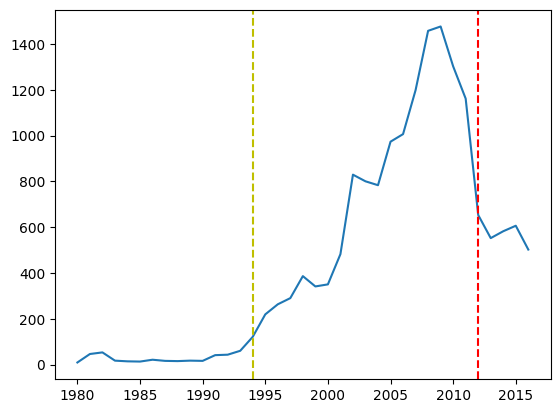

In [7]:
#3.1 Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

#print(df['year_of_release'].value_counts().sort_index())
#print(df['year_of_release'].value_counts().sort_index()/16715) # calcula % com ralçaõa ao total de jogos
plt.plot(df['year_of_release'].value_counts().sort_index())
plt.axvline(x=2012, color = 'r', linestyle= '--')#obs.: declinio de venda em 2012, saindo de 1136 vendas em  2011 para 653 em 2012
plt.axvline(x=1994, color = 'y', linestyle= '--')

# jogos lançados antes de 1995 tem menos de 1% de participação(1980-1994 cada um com menos que 1% )
#obs.: declinio de venda em 2012, saindo de 1136 vendas em  2011 para 653 em 2012

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Comportamento de lançamentos ao longo dos anos investigado.
</div>

<AxesSubplot:xlabel='platform'>

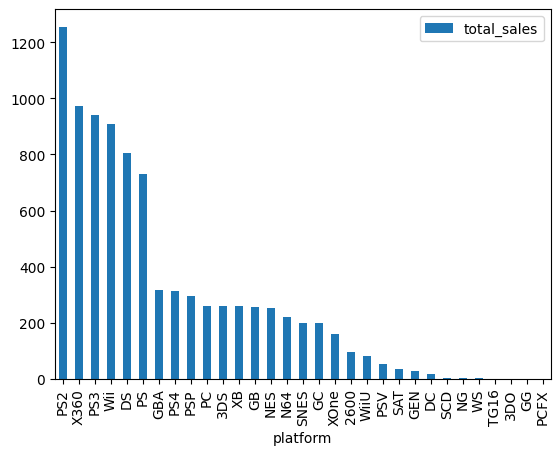

In [8]:
#3.2 Veja como as vendas variaram de plataforma para plataforma. 
grb_plataform_sales = df.groupby(['platform']).agg({'total_sales':'sum'})
grb_plataform_sales = grb_plataform_sales.sort_values('total_sales',ascending = False).reset_index()
grb_plataform_sales.plot.bar(x = 'platform', y = 'total_sales')
#grb_plataform_sales.head()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas por plataformas investigada.  
</div>

In [9]:
#3.3.1 Escolha as plataformas com as maiores vendas totais

grb_plataform_sales['total'] = grb_plataform_sales['total_sales'].sum() # encontrando valor total da vendas para extrair plataformas que no total repesente 80%
limite = grb_plataform_sales['total_sales'].sum() * 0.7
top_platform = [] #seleção das plataformas que representam a parcela das vendas
acumulado_de_vendas =0.0
for _, row in grb_plataform_sales.iterrows():
    if acumulado_de_vendas < limite :
        top_platform.append(row['platform'])
        acumulado_de_vendas = acumulado_de_vendas + row['total_sales']
    else:
        break


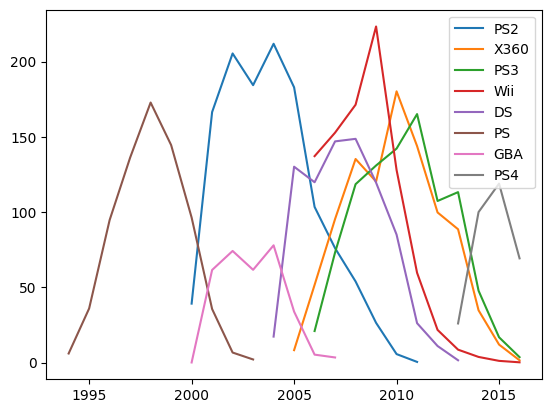

In [10]:
#3.3.2construa uma distribuição com base em dados para cada ano

def plot_graf_vendas_ano(plataformas,data_frame):
    #agrupamento
    for plataformas in top_platform :
        filtro_wii = data_frame[data_frame['platform']== plataformas]
        grb_wii = filtro_wii.groupby(['year_of_release','platform']).agg({'total_sales':'sum'})
        grb_wii = grb_wii.reset_index()
        grb_wii = grb_wii.sort_values('year_of_release')
        #plotagem
        plt.plot(grb_wii['year_of_release'], grb_wii['total_sales'],label= plataformas)
    plt.legend()
    plt.show()
    return None

plot_graf_vendas_ano(top_platform,df)

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Principais plataformas com o comportamento ilustardo. 
</div>

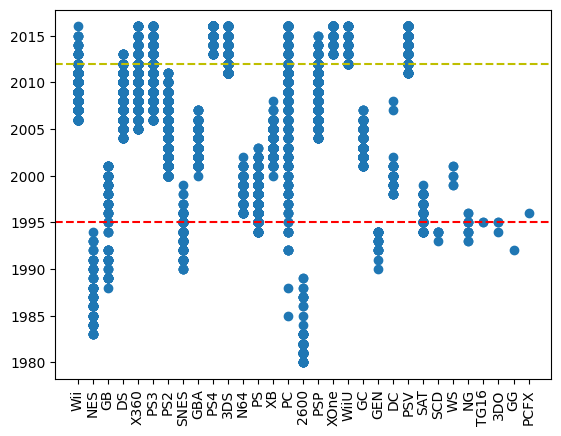

Wii início de vendas: 2006.0 última venda: 2016.0 tempo de vida: 10.0
NES início de vendas: 1983.0 última venda: 1994.0 tempo de vida: 11.0
GB início de vendas: 1988.0 última venda: 2001.0 tempo de vida: 13.0
DS início de vendas: 2004.0 última venda: 2013.0 tempo de vida: 9.0
X360 início de vendas: 2005.0 última venda: 2016.0 tempo de vida: 11.0
PS3 início de vendas: 2006.0 última venda: 2016.0 tempo de vida: 10.0
PS2 início de vendas: 2000.0 última venda: 2011.0 tempo de vida: 11.0
SNES início de vendas: 1990.0 última venda: 1999.0 tempo de vida: 9.0
GBA início de vendas: 2000.0 última venda: 2007.0 tempo de vida: 7.0
PS4 início de vendas: 2013.0 última venda: 2016.0 tempo de vida: 3.0
3DS início de vendas: 2011.0 última venda: 2016.0 tempo de vida: 5.0
N64 início de vendas: 1996.0 última venda: 2002.0 tempo de vida: 6.0
PS início de vendas: 1994.0 última venda: 2003.0 tempo de vida: 9.0
XB início de vendas: 2000.0 última venda: 2008.0 tempo de vida: 8.0
PC início de vendas: 1985.0 úl

In [11]:
#3.4 Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. 
plt.scatter(df['platform'],df['year_of_release'])
plt.axhline(y=1995,color='r' ,linestyle= '--' ) #linha de corte , jogos anteriores a 1995 tem menos de 1% de venda
plt.axhline(y=2012,color='y' ,linestyle= '--' )#obs.: em 3.1 vimos queda de vendas aqui vemos a linha amarela prixmo ao fim do ps2
plt.xticks(rotation = 90)
plt.show()

#Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem
platform_list=df['platform'].unique()
contagem = 0
acumulado= 0
tempo_de_vida = 0
def nasc_morte_platform(platforma):
    filtro_nm = df[df['platform'] == platforma]
    minimo_nm = filtro_nm['year_of_release'].min()
    max_nm = filtro_nm['year_of_release'].max()
    tempo_de_vida = max_nm - minimo_nm    
    print(platforma, 'início de vendas:', minimo_nm, 'última venda:', max_nm, 'tempo de vida:', tempo_de_vida)
    return  None 
for row in platform_list:
    nasc_morte_platform(row)

  

#Determine para qual período você deve pegar dados.

    
    --o periodo de 1995 em diante repesente até 2012 represente "o periodo de ouro dos jogos", utilizando os dados de 1995 em diante teremos uma fatia proxima aos 70% de vendas e exvuiermos varias plataformas antigas.--
    
    ou tlavez devessemos considerar a media de vida das plataforma de 6 anos e ficar com 2010 em diante
    

#Os dados te deveriam permitir construir um modelo para 2017.

    sim

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ciclo de vida das plataformas foi estudado. BBoa escolha de visualização!   
</div>

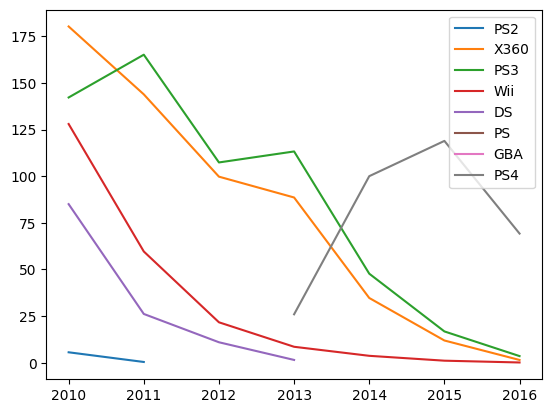

   platform  total_sales
0       PS3       596.05
1      X360       560.59
2       PS4       314.14
3       3DS       259.00
4       Wii       222.97
5      XOne       159.32
6        PC       125.72
7        DS       123.75
8      WiiU        82.19
9       PSP        64.05
10      PSV        54.07
11      PS2         6.09


In [12]:
#Trabalhar apenas com os dados que você decidiu que são relevantes. 
#Desconsidere os dados de anos anteriores.
df_2=df[df['year_of_release']>2009]
#Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? 
list_platform = df_2['platform'].unique()
plot_graf_vendas_ano(list_platform,df_2)

ssd = df_2.groupby(['platform']).agg({'total_sales':'sum'}).sort_values('total_sales',ascending = False).reset_index()
print(ssd)

#Selecione várias plataformas potencialmente lucrativas.
        #PS4- com maior vendas em 2016
        #PS3 , Xbox360 - maiores vendas acumuladas

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Decisão de período de dados para prever 2017 tomada de forma adequada.
</div>

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

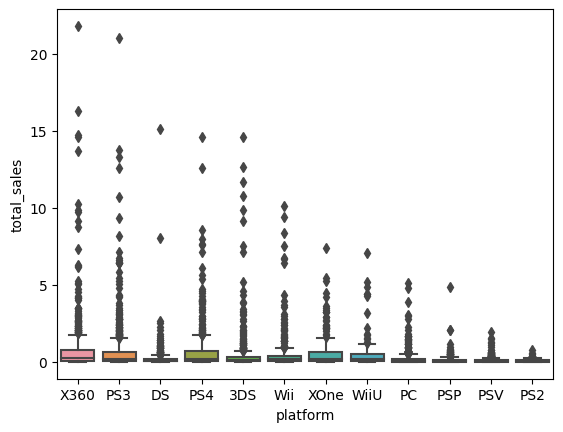

In [13]:
#Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma
sns.boxplot(x = 'platform', y = 'total_sales', data = df_2 )
        
#As diferenças nas vendas são significativas? 
        #sim
#E quanto às vendas médias em várias plataformas? 
#Descreva suas descobertas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Boxplot construído conforme solicitado.  
</div>

corelação : 0.3999945061878434


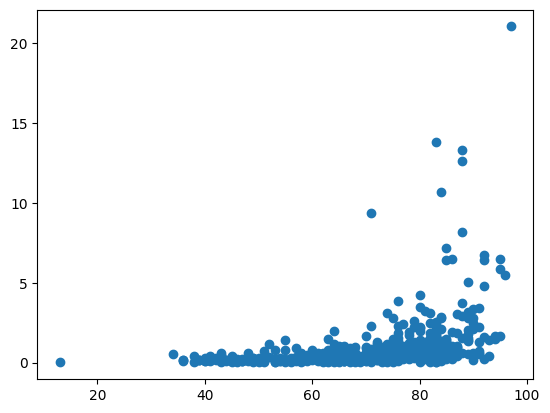

In [14]:
#Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe).
#Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. 
#revisão de críticos 
df_2_ps3= df_2[df_2['platform'] == 'PS3']
plt.scatter(df_2_ps3['critic_score'] ,df_2_ps3['total_sales'])
print('corelação :', df_2_ps3['critic_score'].corr(df_2_ps3['total_sales']))
#Tire conclusões.
        #Não existe correlação forte 

/tmp/ipykernel_346/2704295234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_user_score['user_score'] = df_2_user_score['user_score'].astype(float)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


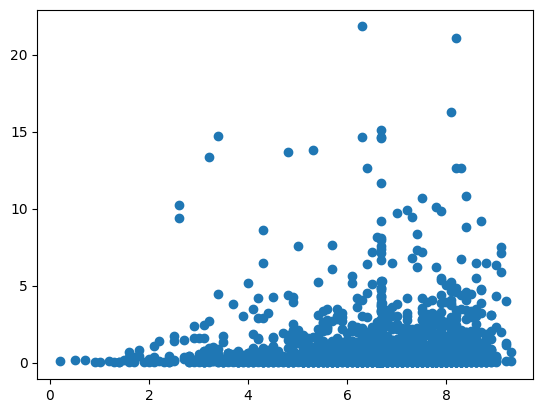

corelação : 0.04802256800561314


In [15]:
#revisão de usuários 

#fitragem de dados tbd
df_2_user_score = df_2[df_2['user_score'] != 'tbd']
#conversão para float
df_2_user_score['user_score'] = df_2_user_score['user_score'].astype(float)
#substiuição de valores NaN pela media
df_2_user_score_mean=df_2_user_score['user_score'].mean()
df_2_user_score['user_score'].fillna(value=df_2_user_score_mean,inplace=True)
#plotando gráfico 
plt.scatter(df_2_user_score['user_score'] ,df_2_user_score['total_sales'])
plt.show()
print('corelação :', df_2_user_score['user_score'].corr(df_2_user_score['total_sales']))

#Não existe correlação forte 

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante conduzir a análise para as críticas de usuários e profissionais.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>


In [16]:
#Com essas conclusões em mente, compare as vendas em outras plataformas.

<AxesSubplot:xlabel='genre'>

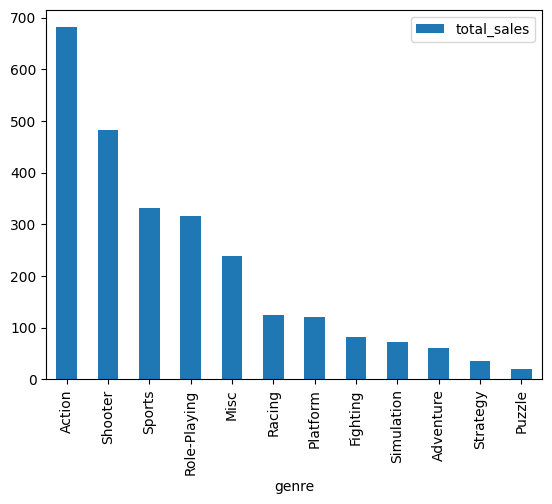

In [17]:
#Dê uma olhada na distribuição geral de jogos por gênero.
grb_genre_sales = df_2.groupby(['genre']).agg({'total_sales':'sum'})
grb_genre_sales = grb_genre_sales.sort_values('total_sales', ascending = False)
grb_genre_sales.plot.bar()
#O que podemos dizer sobre os gêneros mais lucrativos?
     #os top 3 são: Action, Sports, Shooter
#Você pode generalizar sobre gêneros com vendas altas e baixas?
    #sim ,existem jogos com vendas altas >350 , medias e baixas < 150

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Gêneros investigados nessa sessão.  
</div>

## Crie um perfil de usuário para cada região

             EUA      JP      EU  Other
platform                               
3DS        83.49  100.67   61.48  13.36
DS         59.66   27.90   28.06   8.13
PC         40.26    0.00   70.89  14.57
PS2         2.32    0.80    1.67   1.30
PS3       232.61   60.04  216.68  86.72
PS4       108.74   15.96  141.09  48.35
PSP         9.65   42.20    7.59   4.61
PSV        12.58   21.91   13.12   6.46
Wii       121.20   17.75   65.91  18.11
WiiU       38.10   13.01   25.13   5.95
X360      340.91    5.59  165.85  48.24
XOne       93.12    0.34   51.59  14.27


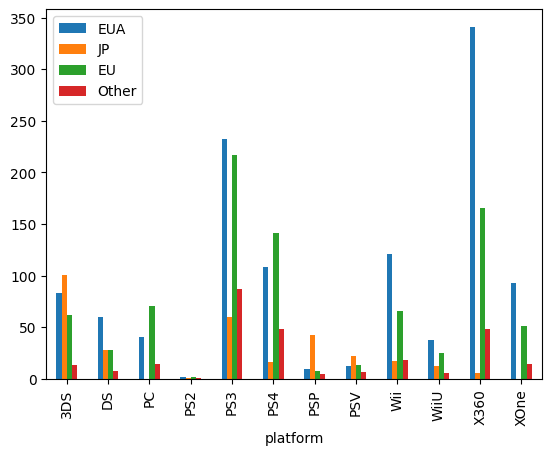

In [18]:
#As cinco plataformas principais. 
#Perfis:     
    #EUA
grb_plat_na_sales = df_2.groupby(['platform']).agg({'na_sales':'sum'})
grb_plat_na_sales.rename(columns={'na_sales': 'EUA'},inplace = True)
    #JP
grb_plat_jp_sales = df_2.groupby(['platform']).agg({'jp_sales':'sum'})
grb_plat_jp_sales.rename(columns={'jp_sales': 'JP'},inplace = True)
    #EU
grb_plat_eu_sales = df_2.groupby(['platform']).agg({'eu_sales':'sum'})
grb_plat_eu_sales.rename(columns={'eu_sales': 'EU'},inplace = True)
    #Other
grb_plat_other_sales = df_2.groupby(['platform']).agg({'other_sales':'sum'})
grb_plat_other_sales.rename(columns={'other_sales': 'Other'},inplace = True)

#unindo perfis
concat_perfis_plat=pd.concat([grb_plat_na_sales,grb_plat_jp_sales,grb_plat_eu_sales,grb_plat_other_sales], axis='columns')

#plotando
concat_perfis_plat.plot(kind="bar")
print(concat_perfis_plat)
#Descreva as variações das suas quotas de mercado de região para região.
#EUA -X360
#JP - 3DS
#EU - PS3
#other - PS3

                 EUA      JP      EU  Other
genre                                      
Action        294.06   72.84  236.60  77.50
Adventure      20.93   15.69   18.88   5.62
Fighting       39.12   13.90   20.38   8.33
Misc          127.16   24.30   66.92  20.86
Platform       54.90   15.81   38.78  10.71
Puzzle          9.36    3.40    6.58   1.55
Racing         46.70    6.70   55.83  15.45
Role-Playing  112.41  103.70   75.65  24.29
Shooter       239.14   14.10  172.81  57.19
Simulation     27.14   13.36   26.41   5.73
Sports        158.16   15.54  117.51  39.48
Strategy       13.56    6.83   12.71   3.36


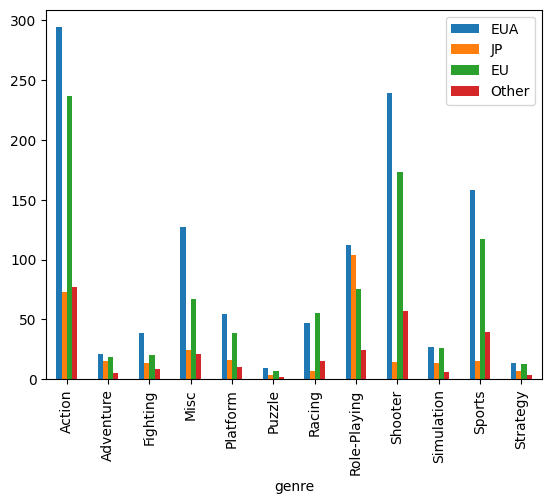

In [19]:
#Os cinco principais gêneros. Explique a diferença.
 #EUA
grb_genre_na_sales = df_2.groupby(['genre']).agg({'na_sales':'sum'})
grb_genre_na_sales.rename(columns={'na_sales': 'EUA'},inplace = True)
    #JP
grb_genre_jp_sales = df_2.groupby(['genre']).agg({'jp_sales':'sum'})
grb_genre_jp_sales.rename(columns={'jp_sales': 'JP'},inplace = True)
    #EU
grb_genre_eu_sales = df_2.groupby(['genre']).agg({'eu_sales':'sum'})
grb_genre_eu_sales.rename(columns={'eu_sales': 'EU'},inplace = True)
    #Other
grb_genre_other_sales = df_2.groupby(['genre']).agg({'other_sales':'sum'})
grb_genre_other_sales.rename(columns={'other_sales': 'Other'},inplace = True)

#unindo perfis
concat_perfis=pd.concat([grb_genre_na_sales,grb_genre_jp_sales,grb_genre_eu_sales,grb_genre_other_sales], axis='columns')

#plotando
concat_perfis.plot(kind="bar")
print(concat_perfis)
#Descreva as variações das suas quotas de mercado de região para região.
#indepenedente do genero os EUA estão sempre na frente quanto a vendas 
#EUA -Action
#JP - Role-plaing
#EU - Action
#other - action

              EUA      JP      EU  Other
rating                                  
E          272.42   47.88  197.66  60.23
E10+       160.70   13.22  101.00  31.49
EC           1.13    0.00    0.00   0.07
M          385.53   31.11  295.05  97.87
RP           0.00    0.00    0.08   0.01
T          166.59   42.26  115.41  39.74
undefined  156.27  171.70  139.86  40.66


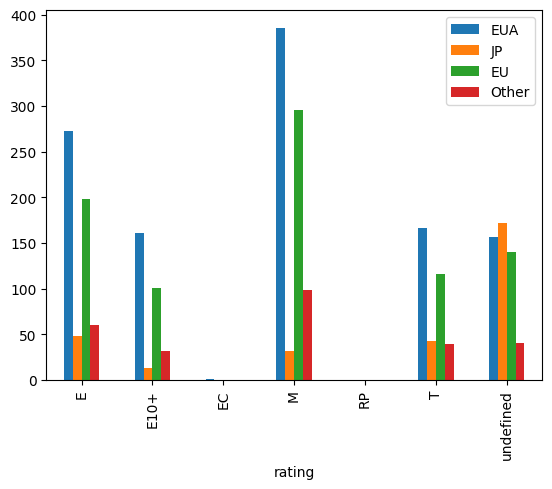

In [20]:
#As classificações do ESRB afetam as vendas em regiões individuais?
#Perfis:     
    #EUA
grb_rating_na_sales = df_2.groupby(['rating']).agg({'na_sales':'sum'})
grb_rating_na_sales.rename(columns={'na_sales': 'EUA'},inplace = True)
    #JP
grb_rating_jp_sales = df_2.groupby(['rating']).agg({'jp_sales':'sum'})
grb_rating_jp_sales.rename(columns={'jp_sales': 'JP'},inplace = True)
    #EU
grb_rating_eu_sales = df_2.groupby(['rating']).agg({'eu_sales':'sum'})
grb_rating_eu_sales.rename(columns={'eu_sales': 'EU'},inplace = True)
    #Other
grb_rating_other_sales = df_2.groupby(['rating']).agg({'other_sales':'sum'})
grb_rating_other_sales.rename(columns={'other_sales': 'Other'},inplace = True)

#unindo perfis
concat_perfis_rating=pd.concat([grb_rating_na_sales,grb_rating_jp_sales,grb_rating_eu_sales,grb_rating_other_sales], axis='columns')

#plotando
concat_perfis_rating.plot(kind="bar")
print(concat_perfis_rating)

#As classificações do ESRB afetam as vendas em regiões individuais?

#EUA -M
#JP - Não definido ¬¬
#EU - M
#other - M

#classificação M é a preferida na maioria das regiões (3/4)


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Agrupamentos regionais realizados e comparados levando em conta plataformas, gênero e classificação. Muito bom!
</div>



## Teste de hipóteses
Defina o valor do limiar alfa você mesmo.

In [21]:
#As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

df_2_xboxone=df_2[df_2['platform']== 'XOne']
df_2_pc=df_2[df_2['platform']== 'PC']

# excluindo linhas com TBD
df_2_pc = df_2_pc[df_2_pc['user_score'] != "tbd"]
df_2_xboxone = df_2_xboxone[df_2_xboxone['user_score'] != "tbd"]
#covertendo str pra float
df_2_pc['user_score']=df_2_pc['user_score'].astype(float)
df_2_xboxone['user_score']=df_2_xboxone['user_score'].astype(float)
#prenechendo NaN pela media
pc_mean=df_2_pc['user_score'].mean()
df_2_pc['user_score'].fillna(value=pc_mean,inplace=True)
xbox_mean=df_2_pc['user_score'].mean()
df_2_xboxone['user_score'].fillna(value=xbox_mean,inplace=True)

alpha = 0.05
results = st.ttest_ind(df_2_pc['user_score'],df_2_xboxone['user_score'])
print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
    print()
    print('As classificações médias dos usuários das plataformas Xbox One e PC Não são as mesmas')
else:
    print("Não podemos rejeitar a hipótese nula")
    print()
    print('As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas')

valor-p:  0.9374811126427011
Não podemos rejeitar a hipótese nula

As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas


In [22]:
#As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

# H0 -As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas

df_2_Action=df_2[df_2['genre']== 'Action']
df_2_Sports=df_2[df_2['genre']== 'Sports']

# excluindo linhas com TBD
df_2_Action = df_2_Action[df_2_Action['user_score'] != "tbd"]
df_2_Sports = df_2_Sports[df_2_Sports['user_score'] != "tbd"]
#covertendo str pra float
df_2_Action['user_score']=df_2_Action['user_score'].astype(float)
df_2_Sports['user_score']=df_2_Sports['user_score'].astype(float)
#prenechendo NaN pela media
Action_mean=df_2_Action['user_score'].mean()
df_2_Action['user_score'].fillna(value=Action_mean,inplace=True)
Sports_mean=df_2_Sports['user_score'].mean()
df_2_Sports['user_score'].fillna(value=Sports_mean,inplace=True)

alpha = 0.05
results = st.ttest_ind(df_2_Sports['user_score'],df_2_Action['user_score'])
print('valor-p: ', results.pvalue) # extraindo o valor-p

if results.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
    print()
    print('As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) NÃo são as mesmas')
else:
    print("Não podemos rejeitar a hipótese nula")
    print()
    print('As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas')
    


valor-p:  2.8146385593973155e-45
Rejeitamos a hipótese nula

As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) NÃo são as mesmas


Explique: 

— Como você formula as hipóteses alternativas e nulas.

as Hipóteses nulas devem ser aquelas que não oferem mudaças , devem se de que são iguais já as alternativas devem ser as contrarias as nulas

— Quais critérios você usou para testar as hipóteses, e por quê
em ambos coloquei alpha 0.05 cpois assim existe uma chace de  5%  de rejeitar a hipotese. 



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>


## Conclusão geral

-declínio de venda em 2012, saindo de 1136 vendas em  2011 para 653 em 2012

-a media de vida das plataforma é de  6 anos

-não existe correlação forte entre revisão e vendas

-os top 3 gêneros são: Action, Sports, Shooter

-plataforma favorita por região EUA -X360 JP - 3DS EU - PS3 other - PS3

-o japão é o único que tem preferencia pelo gênero Role-plaing os demais são Action

-o japão tem uma preferencia por jogos ainda sem classificação enquanto as demais regiões tem por jogos classificação M

-As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

-As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) NÃO são as mesmas



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conslusões apresentadas conforme roteiro.
</div>
